# Exploratory Data Analysis using Telco Dataset

In [41]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#load data
telco = pd.read_csv('Telco-Customer-Churn.csv')

In [85]:
#quick look data
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Understanding

In [86]:
# exclude rows with TotalCharges columns contain white space
telco = telco.loc[~telco['TotalCharges'].str.contains(' ')]

In [87]:
# convert TotalCharges columns from str to float
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

In [88]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [89]:
telco.shape
#this data contain of 7032 rows and 21 columns (exclude whitespace in TotalCharges columns)

(7032, 21)

The dataset of an fictional telco company that provided home phone and internet services people in California. Data contain 21 columns and 7032 raw
Here are the data dictionary :

1. CustomerID: A unique ID that identifies each customer. <br>
2. Gender: The customer’s gender: Male, Female. <br>
3. Senior Citizen: Indicates if the customer is 65 or older: 1, 0. <br>
4. Partner: Indicates if the customer is having partner or not: Yes, No <br>
5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc. <br>
6. Tenure: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above. <br>
7. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No <br>
8. MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No. <br>
9. InternetService: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable. <br>
10. OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No <br>
11. OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No. <br>
12. DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No <br>
13. TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No <br>
14. StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service. <br>
15. StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service. <br>
16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. <br>
17. PaperlessBilling: Indicates if the customer has chosen paperless billing: Yes, No <br>
18. PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check <br>
19. MonthlyCharge: Indicates the customer’s current total monthly charge for all their services from the company. <br>
20. TotalCharges: Indicates the customer’s total charges, calculated to the end of the quarter specified above. <br>
21. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.



### Missing Value

#### Standart Mising Value

In [90]:
#there is no missing value
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Non-Standart Missing Value

In [91]:
#looking for another columns that contain white space and 
#another character 
coloum_name = []

def check_space(data):
    for x in data.columns:
        if data[x].isin([' ', '-', '--', 'n/a']).any():
            coloum_name.append(x)
        else:
            pass

    print(coloum_name)

In [92]:
check_space(telco)

[]


There is no `Non Standart Missing Value` from this data (non-standart missing value only found in columns `TotalCharges` before processing this data). limitation check character for the non standart missing value is : whitespace, n/a, -- or -

#### Unexpected Missing Value

For several columns expected to be boolean, binnary or spesific category. for example :
1. If gender is expexted to be string (Male and Female) but get another value
2. If SeniorCitizen is expected to be binnary (0,1) but get another value
3. If columns in list `booloutput_colum` is expected to be Yes or No but get another value

In [93]:
telco['gender'].value_counts()
#there is no unexpected missing value

Male      3549
Female    3483
Name: gender, dtype: int64

In [94]:
telco['SeniorCitizen'].value_counts()
#there is no unexpected missing value

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [95]:
#list of columns contains Yes and No 
booloutput_colum = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
#unpivot several columns (booloutput_columns) in telco dataset 
telco_melt = telco[booloutput_colum].melt(var_name= 'columns', value_name= 'index' )

In [96]:
#then use crosstab to count the value for each columns
data = pd.crosstab(index=telco_melt['index'], columns=telco_melt['columns'])
data

columns,Churn,Dependents,DeviceProtection,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PhoneService,StreamingMovies,StreamingTV,TechSupport
index,,,,,,,,,,,,
No,5163,4933,3094,3385,3087,3497,2864,3639,680,2781,2809,3472
No internet service,0,0,1520,0,1520,1520,0,0,0,1520,1520,1520
No phone service,0,0,0,680,0,0,0,0,0,0,0,0
Yes,1869,2099,2418,2967,2425,2015,4168,3393,6352,2731,2703,2040


From the table above, we know that there is unexpected missing value:
1. value `no internet service` in columns : DeviceProtection, OnlineBackup, OnlineSecurity, StreamingMovies, StreamingTV and	TechSupport
2. value `no phone service` in columns : MultipleLines

next step :
I am not delete or replace this unexpected missing value, because we need to discuss more about that.



the `PhoneService` column contain of Yes (cust subscribe phone service) & No (cust not subscribe)

move to the `MultipleLines` column which is contain Yes (cust subscribe phone service & multiple telephone line), No (cust subscibe phone service but they don't subscribe multiple phone line) and `No phone service` means that cust who don't subscibe the phone service definitely dont subscibe to multiple telephone line, because total value between value No (PhoneService) and No phone service (MultipleLines) is same

### Duplicate Data Check

In [97]:
#There is no data duplicate in 
telco.duplicated().sum()

0

## Data Understanding

### Statistical Summary

In [98]:
#Numerical statistical summary 
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observations: 

1. Columns `SeniorCitizen` is binnary, the value of this columns definitely 1 and 0.
2. `Tenure` are discrete but there are quite a lot value. indicate not symetrical distribution from mean and median value
3. `MonthlyCharges` and TotalCharges indicate not a symetrical distribution


In [99]:
telco.describe(include= 'object').transpose()

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Observations:
1. `gender` have 2 unique value, which is the median is Male
2.  overall columns don't have unique value more that 5
3.  most of the columns is binaary columns


## Univariate Analysis

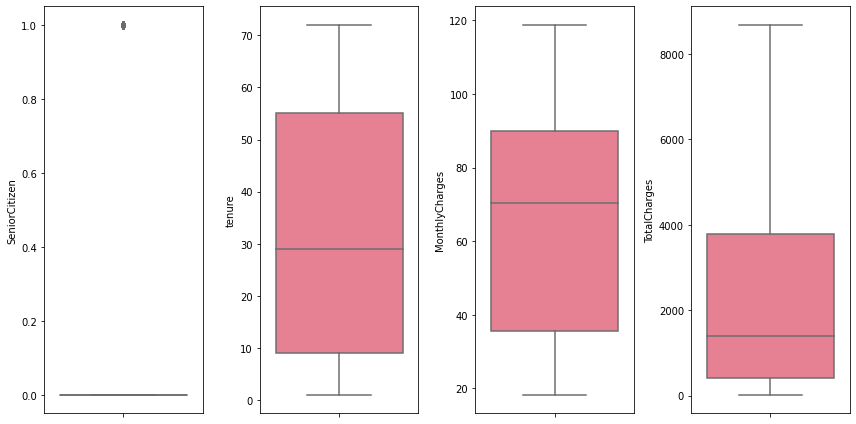

In [100]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))
numericals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=telco[features[i]], palette='husl')
    plt.tight_layout()

Observation :

1. There is one outlier in columns SeniorCitizen. but, `SeniorCitizen` is binnary value, the outlier (value = 1) is reasonable. so, no need to handle spesifically

c:\Users\Titim\Desktop\tf\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Titim\Desktop\tf\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Titim\Desktop\tf\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

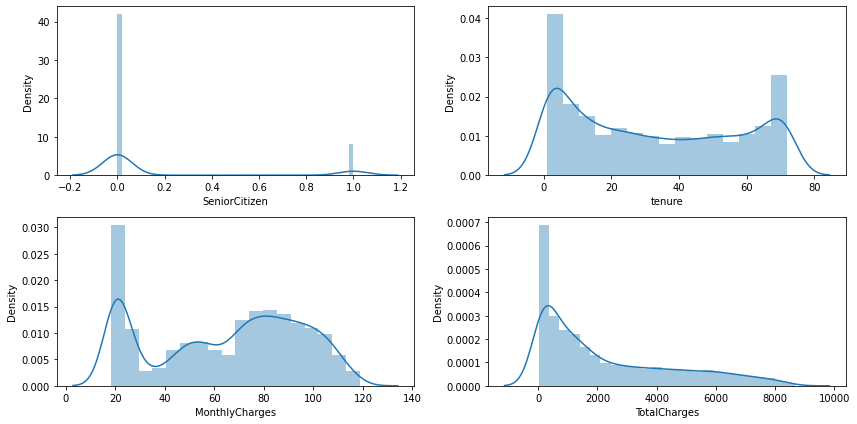

In [101]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2, i+1)
    sns.distplot(x=telco[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Observation :

1. `SeniorCitizen` is binnary value, so we can ignore
2. `Tenure` is discrete value and indicate as bimodal asymmetrical distribution.there is two peak.
3. `MonthlyCharges` indicate as a multimodal, the first peak identify as a normal distribution, but i have problem to identify other
4. `TotalCharges` indicate as a positive skewed or right skewed distribution. the graph seems to pull the graph toright
5. overall there in no outlier

## I have a question

I still confuse about how to analyze and explain bimodal and multimodal distribution, apakah mas Parara have a reference how to deal with it. thank you

<AxesSubplot:xlabel='Churn', ylabel='count'>

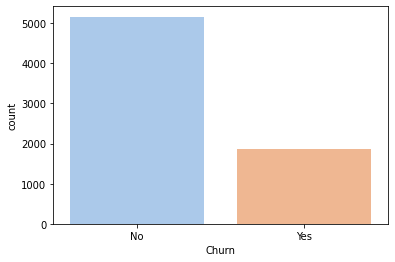

In [102]:
sns.countplot(data=telco,
            x='Churn',
            palette="pastel")

From the data, we know that Churn column is a target variable and the distribution is <br> 
value 0 or No Churn is more than 1 or Yes Churn

## Bivariate Analysis

In [123]:
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

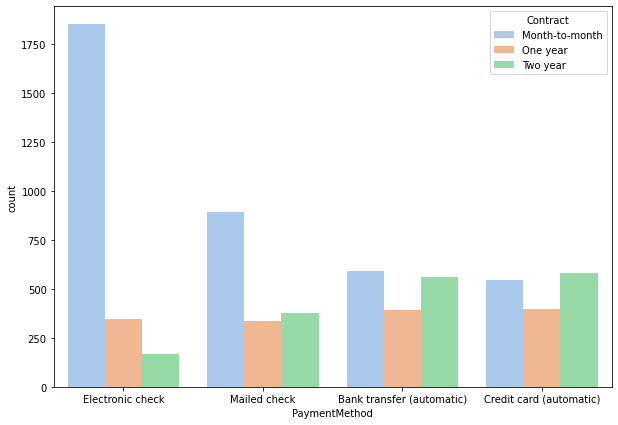

In [140]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=telco,
            x='PaymentMethod',
            hue='Contract',
            palette= 'pastel')

Observation :

1. Customer who cust longer contract usually choose automatic payment mode like automatic bank transfer and Credit card

<AxesSubplot:xlabel='Churn', ylabel='count'>

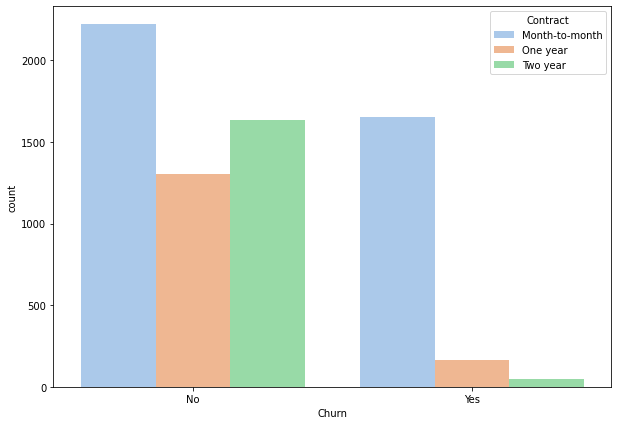

In [141]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(data=telco,
            x='Churn',
            hue='Contract',
            palette= 'pastel')

Observation :

1. Most churn happen in monthly contract, it's make sense bacause people can change easy every mounth. <br>
lowest frequent churn happen in the contract two years

In [109]:
telco_corr = telco.replace({'Churn' : {'Yes' : 1, 'No' : 0}})

Text(0.5, 1.0, 'Telco Data Correlation')

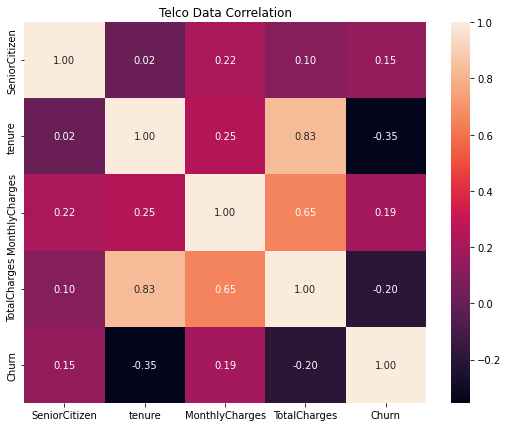

In [122]:
correlation = telco_corr.corr()
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(correlation, annot=True, fmt='.2f')
ax.set_title("Telco Data Correlation")

Observation :

1. from graph above we know that columns SeniorCitizen, MonthlyCharges and TotalCharges don't have enough correlation with target variable
2. `TotalCharges` and `tenure` are highly correlation each other, the more tenure customer take, the higher charges cust
3. `MonthlyCharges` and `TotalCharges` also have high correlation

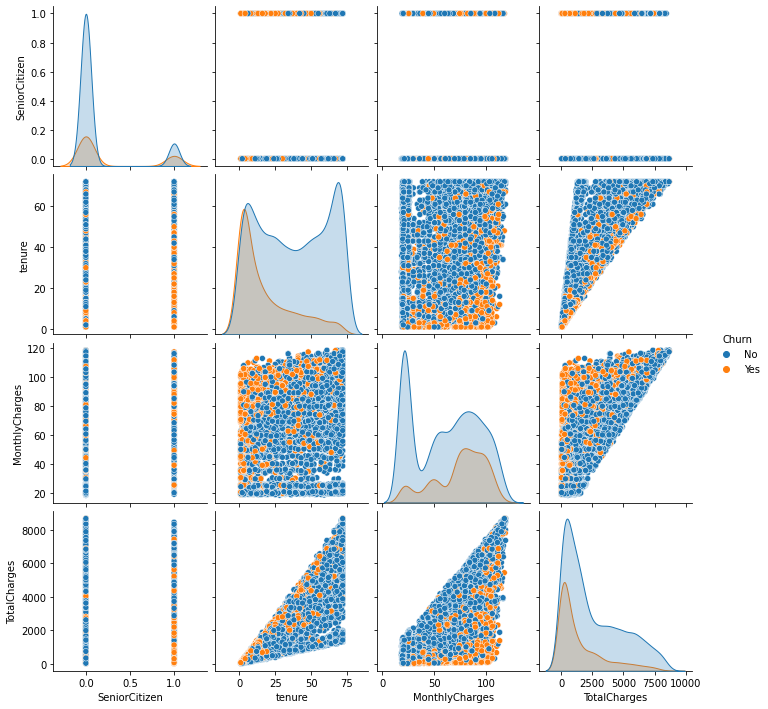

In [118]:
sns.pairplot(telco, hue='Churn')

Observations :

1. Most Churn happen in the low tenure user and high monthly charges
2. support the correlation in heatmap graph above. higher tenur they take, higher charges they have to pay


In [142]:
telco.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Question 1
### What kind of InternetService product with the highest TotalCharges?

In [154]:
top_internetservice = (telco
                    .groupby('InternetService')
                    .agg(total_charges = ('TotalCharges', 'sum'))
                    .reset_index()
                    .sort_values('total_charges',ascending=False)
                    )

top_internetservice

,InternetService,total_charges
1,Fiber optic,9923622.95
0,DSL,5121410.85
2,No,1011134.90


<AxesSubplot:xlabel='InternetService', ylabel='total_charges'>

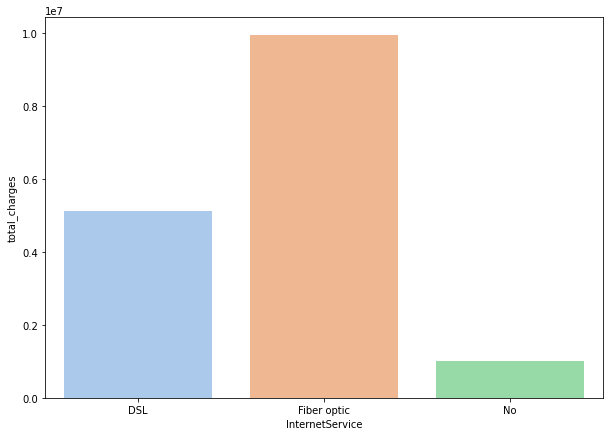

In [150]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=top_internetservice,
            x='InternetService',
            y='total_charges',
            palette= 'pastel')

Fiber optic is the most profitable InternetService product with the highest TotalCharges

## Question 2
### The Most customer payment mode use

In [157]:
top_pay = (telco
            .groupby('PaymentMethod')
            .agg(total_use=('customerID','count'))
            .reset_index()
            .sort_values('total_use',ascending=False)
            )
top_pay

,PaymentMethod,total_use
2,Electronic check,2365
3,Mailed check,1604
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521


<AxesSubplot:xlabel='PaymentMethod', ylabel='total_use'>

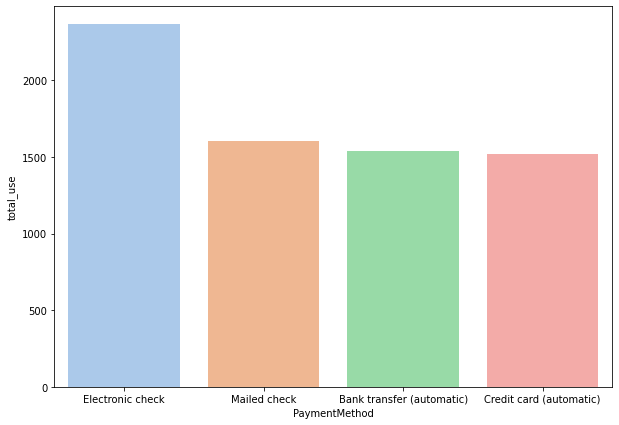

In [158]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=top_pay,
            x='PaymentMethod',
            y='total_use',
            palette= 'pastel')

Electronic Check became most used payment method tha used by customer